1] car dataset -> 
2] pre processing (null records cheecking) and duplicate data set check ->
3] data analysis(what are the important columns and what are the unncessary columns to improve the performance of the machine learning model . after the identifying importatnt columns  we have to split the dataset into  2 parts  1 is input features(that have to fit into the model and what are the expecting from the model) and 2 nd is part od output features.
4] Train test split(spliting the data set into two parts train dataset 80% and test a data set 20%)
5]linear regression model


In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [58]:
cars_data = pd.read_csv("C:/Users/DELL/Downloads/car data.csv")
                        

In [59]:
cars_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [60]:
cars_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [61]:
cars_data.shape

(301, 9)

In [62]:
print("Number of Rows",cars_data.shape[0])
print("Number of Columns",cars_data.shape[1])

Number of Rows 301
Number of Columns 9


2) preprocessing = Null check

In [63]:
cars_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
cars_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
cars_data.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [10]:
import datetime

In [11]:
date_time=datetime.datetime.now()
#print(date_time)
cars_data['Age']=date_time.year - cars_data['Year']

In [12]:
cars_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [13]:
cars_data.drop('Year',axis = 1,inplace = True)

In [14]:
cars_data.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [15]:
import  seaborn as sns

<Axes: ylabel='Selling_Price'>

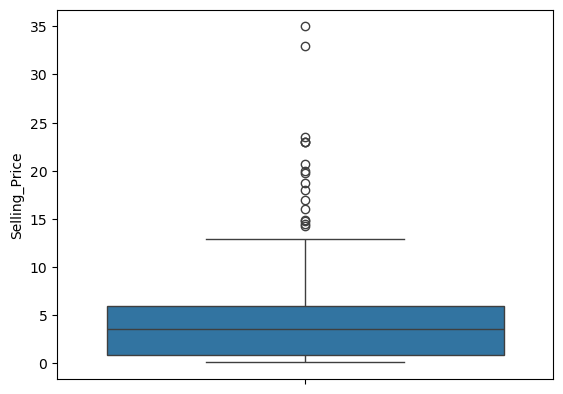

In [16]:
sns.boxplot(cars_data['Selling_Price'])	#to see outliers

In [17]:
cars_data["Selling_Price"]

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [18]:
sorted(cars_data["Selling_Price"],reverse = True) #see which is outliers

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [19]:
cars_data[(cars_data["Selling_Price"]>=33.0) & (cars_data["Selling_Price"]<=35.0)]

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,8
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,15


In [20]:
cars_data=cars_data[~(cars_data["Selling_Price"]>=33.0) & (cars_data["Selling_Price"]<=35.0)]

In [21]:
cars_data.shape #successfully deleted 2 outliers

(299, 9)

In [22]:
#cars_data.dropna(inplace = True)


In [23]:
#cars_data.shape

Duplicate check 


In [24]:
#cars_data.duplicated().sum()

In [25]:
#cars_data.drop_duplicates(inplace = True)
#cars_data.shape

In [26]:
#cars_data

In [27]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Selling_Price  299 non-null    float64
 2   Present_Price  299 non-null    float64
 3   Driven_kms     299 non-null    int64  
 4   Fuel_Type      299 non-null    object 
 5   Selling_type   299 non-null    object 
 6   Transmission   299 non-null    object 
 7   Owner          299 non-null    int64  
 8   Age            299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


Data Analysis


In [28]:
for col in cars_data.columns:
    print("Unique values of " +col)
    print (cars_data[col].unique)
    print("=====================\n")

Unique values of Car_Name
<bound method Series.unique of 0         ritz
1          sx4
2         ciaz
3      wagon r
4        swift
        ...   
296       city
297       brio
298       city
299       city
300       brio
Name: Car_Name, Length: 299, dtype: object>

Unique values of Selling_Price
<bound method Series.unique of 0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64>

Unique values of Present_Price
<bound method Series.unique of 0       5.59
1       9.54
2       9.85
3       4.15
4       6.87
       ...  
296    11.60
297     5.90
298    11.00
299    12.50
300     5.90
Name: Present_Price, Length: 299, dtype: float64>

Unique values of Driven_kms
<bound method Series.unique of 0      27000
1      43000
2       6900
3       5200
4      42450
       ...  
296    33988
297    60000
298    87934
299     9000
300     5464
Name: Driven_kms, L

In [29]:
for col in cars_data.columns:
    print("Unique values of " +col)
    print (cars_data[col].unique())
    print("=====================\n")

Unique values of Car_Name
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' '

In [30]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip(' ')

In [31]:
get_brand_name('etios liva')

'etios'

In [32]:
cars_data['Car_Name'] = cars_data['Car_Name'].apply(get_brand_name)

In [33]:
cars_data['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto',
       'ertiga', 'dzire', 'ignis', '800', 'baleno', 'omni', 'fortuner',
       'innova', 'corolla', 'etios', 'camry', 'Royal', 'UM', 'KTM',
       'Bajaj', 'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS', 'Hero',
       'Activa', 'Suzuki', 'i20', 'grand', 'i10', 'eon', 'xcent',
       'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
      dtype=object)

Encoding Categorica' columns

In [34]:
cars_data.head(1)

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,11


In [35]:
cars_data["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [36]:
cars_data["Fuel_Type"]=cars_data["Fuel_Type"].map({'Petrol':0, 'Diesel':1,'CNG':2})

In [37]:
cars_data["Fuel_Type"].unique()

array([0, 1, 2])

In [38]:
cars_data["Selling_type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [39]:
cars_data["Selling_type"]=cars_data["Selling_type"].map({'Dealer':0, 'Individual':1})

In [40]:
cars_data["Selling_type"].unique()

array([0, 1])

In [41]:
cars_data["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [42]:
cars_data["Transmission"]=cars_data["Transmission"].map({'Manual':0, 'Automatic':1})

In [43]:
cars_data["Transmission"].unique()

array([0, 1])

In [44]:
cars_data.head()


,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,11
1,sx4,4.75,9.54,43000,1,0,0,0,12
2,ciaz,7.25,9.85,6900,0,0,0,0,8
3,wagon,2.85,4.15,5200,0,0,0,0,14
4,swift,4.60,6.87,42450,1,0,0,0,11


In [45]:
X = cars_data.drop(["Car_Name","Selling_Price"],axis=1)
y = cars_data["Selling_Price"]

In [46]:
X


,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,5.59,27000,0,0,0,0,11
1,9.54,43000,1,0,0,0,12
2,9.85,6900,0,0,0,0,8
3,4.15,5200,0,0,0,0,14
4,6.87,42450,1,0,0,0,11
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,0,0,9
297,5.90,60000,0,0,0,0,10
298,11.00,87934,0,0,0,0,16
299,12.50,9000,1,0,0,0,8


In [47]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.20,random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


In [50]:
from xgboost import XGBRegressor

print("XGBoost imported successfully!")


XGBoost imported successfully!


In [51]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [75]:
y_pred1 = lr.predict(X_test)
y_pred2 = lr.predict(X_test)
y_pred3 = lr.predict(X_test)
y_pred4  = lr.predict(X_test)

In [76]:
from sklearn import metrics


In [77]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [78]:
print(score1,score2,score3,score4)

0.803526023085957 0.803526023085957 0.803526023085957 0.803526023085957


In [79]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],
                           "R2_SCORE":[score1,score2,score3,score4]})


In [80]:
    final_data

,Models,R2_SCORE
0,LR,0.803526
1,RF,0.803526
2,GBR,0.803526
3,XG,0.803526


<Axes: xlabel='Models', ylabel='R2_SCORE'>

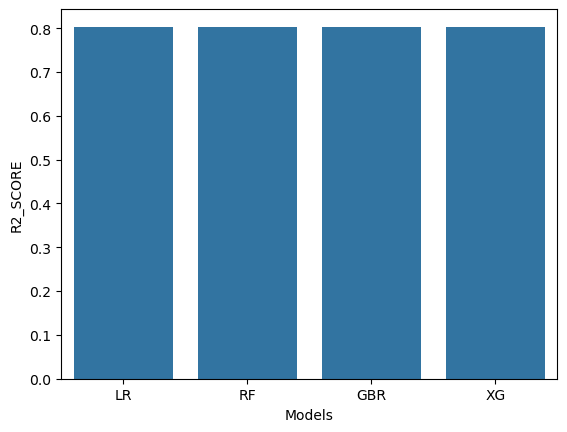

In [83]:
sns.barplot(x=final_data['Models'], y=final_data['R2_SCORE'])  


In [85]:
xg= XGBRegressor()
xg_final = xg.fit(X,y)

In [87]:
import joblib

In [89]:
joblib.dump(xg_final,'car_price_prediction')

['car_price_prediction']

In [91]:
model = joblib.load('car_price_prediction')

In [96]:
import pandas as pd
data_new = pd.DataFrame({
    'Present_Price':5.59,
    'Driven_kms':2700,	
    'Fuel_Type':0,
    'Selling_type':0,
    'Transmission':0,
    'Owner':0,
    'Age':8
},index=[0])

In [98]:
model.predict(data_new)

array([3.650018], dtype=float32)

In [100]:
import pickle as pk


In [101]:
pk.dump(model,open('model.pkl','wb'))